In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in dataset.

In [ ]:
# dropping the unwanted columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [ ]:
# segregating dataset into numeric and categorical colums
num_cols=["temp","atemp","hum","windspeed","cnt"]
cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [ ]:
# Convert season to categorical strings
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [ ]:
# Convert weathersit to categorical strings
df['weathersit'] = df['weathersit'].map({
    1: 'clear',
    2: 'mist',
    3: 'light_rain',
    4: 'heavy_rain'
})

In [ ]:
# Convert month to categorical strings
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
# Convert weekday to categorical strings
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Visualising the Data

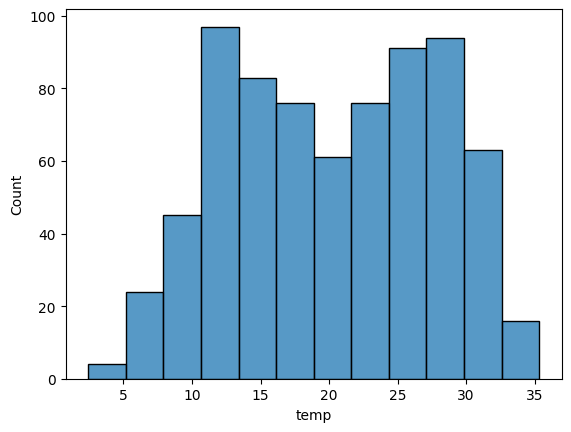

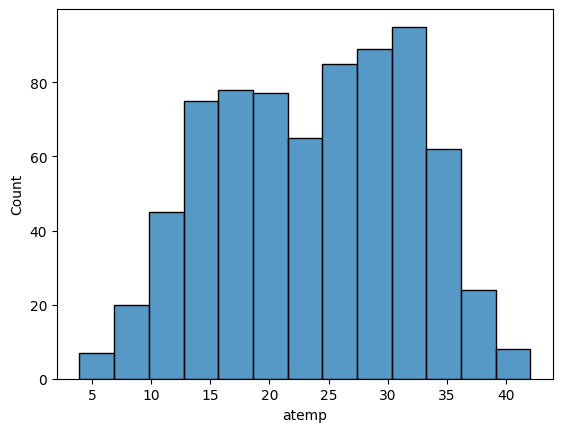

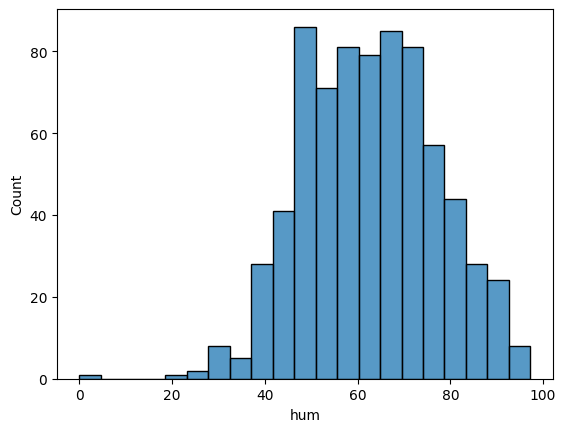

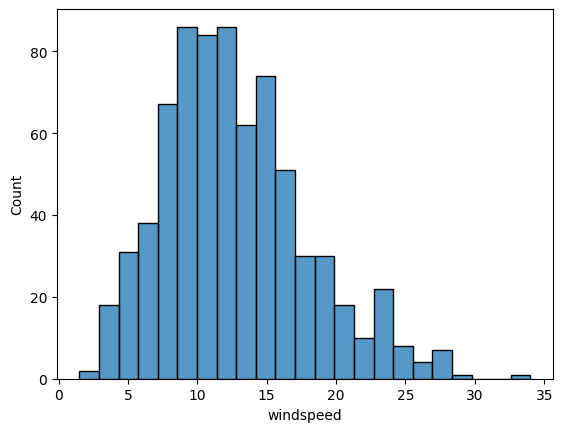

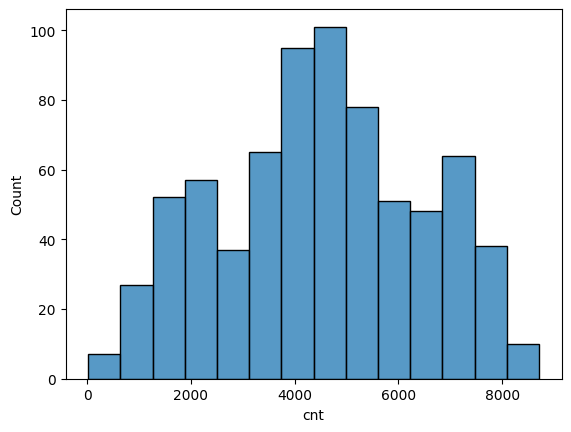

In [ ]:
for i in num_cols:
  sns.histplot(x=df[i])
  plt.show();

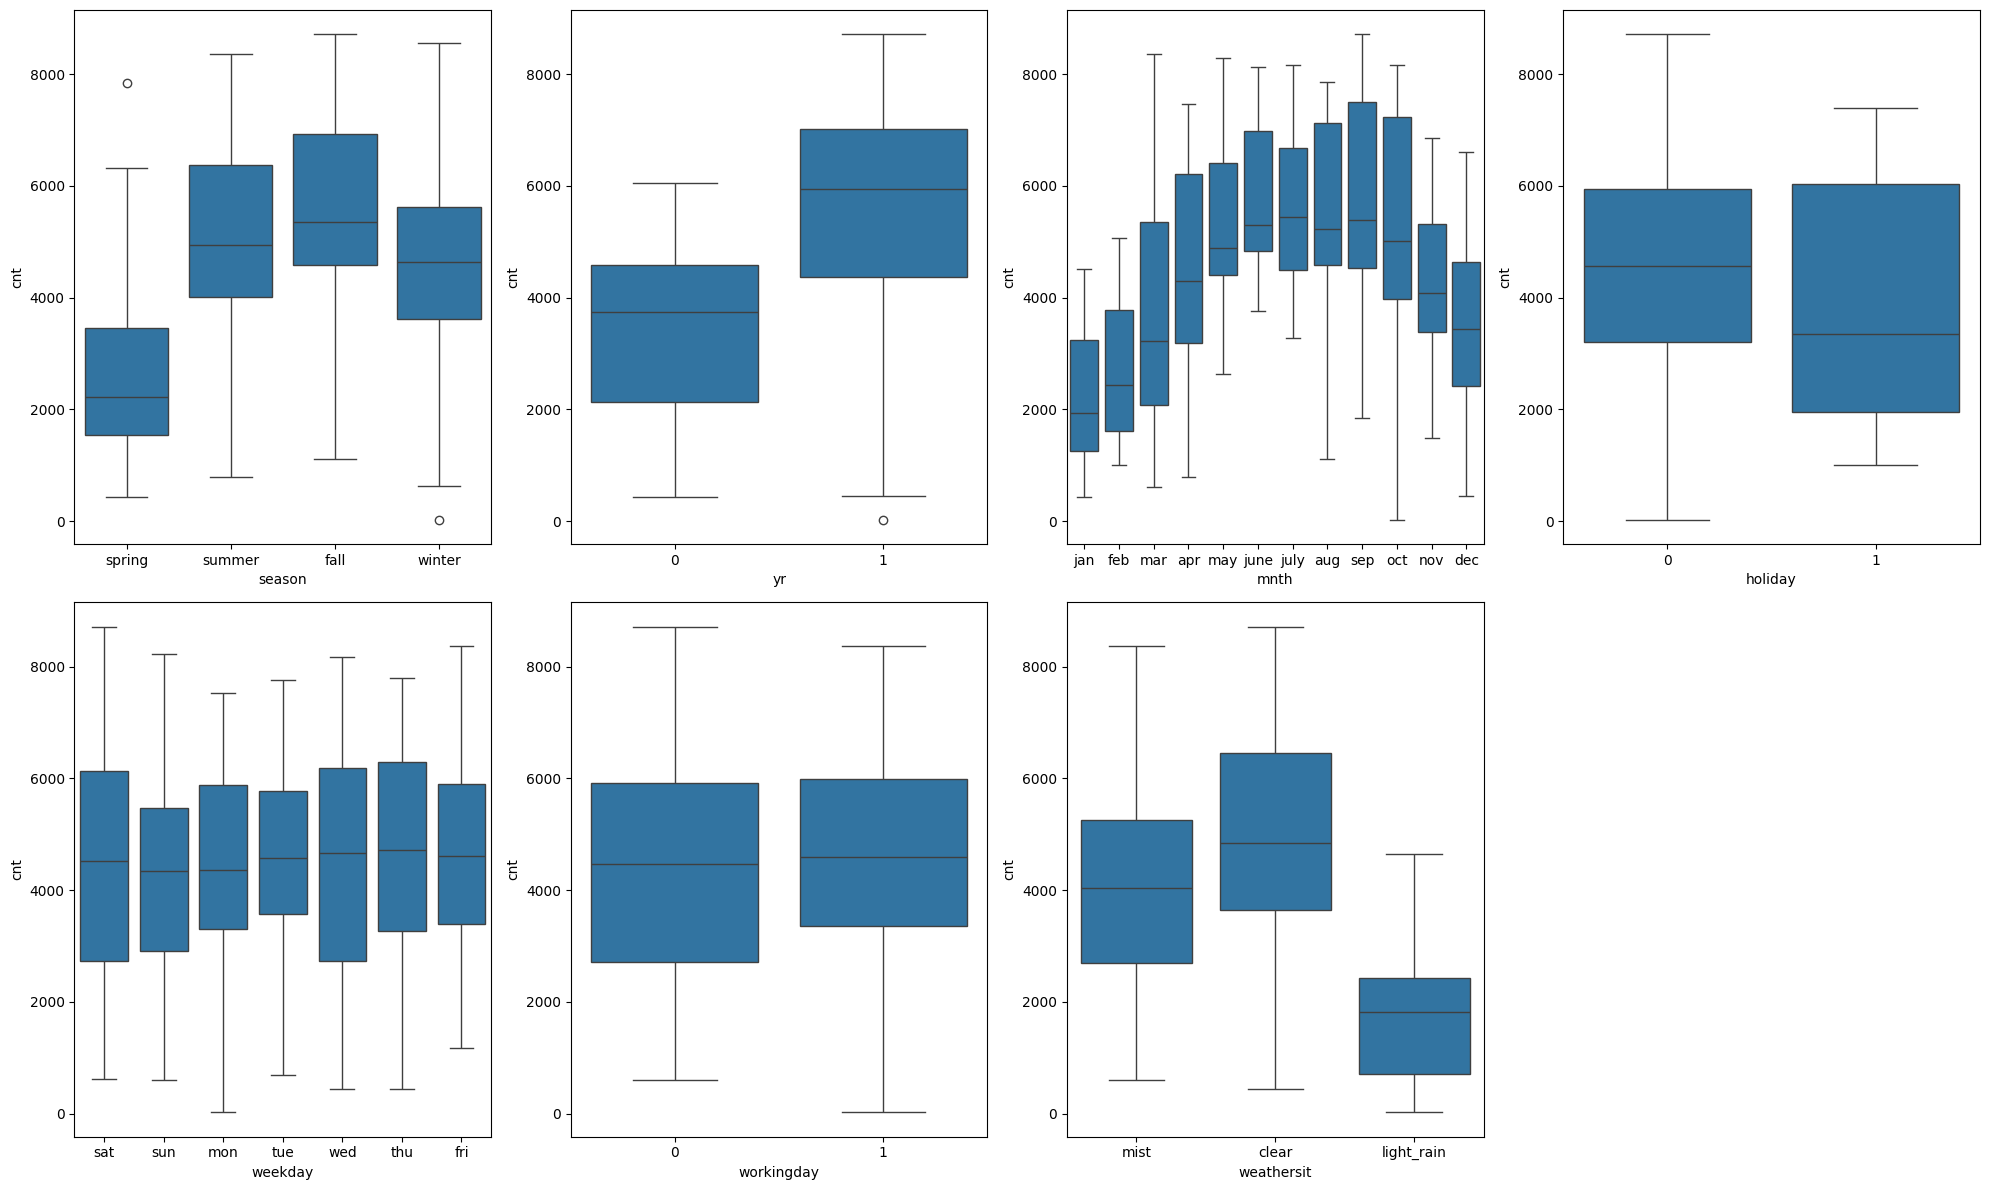

In [ ]:
# Analysing/visualizing the categorical columns to see how variable stands against the target variable
plt.figure(figsize=(20, 12))

for i in range(len(cat_cols)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=cat_cols[i], y='cnt', data=df)

plt.tight_layout()
plt.show()

Inferences:
   - The counts are lowest in the spring season.
   - Summer, fall, and winter have higher median counts compared to spring, with fall having the highest median count.
   - The year 2019 has higher counts compared to the year 2018. This indicates an increase in counts over time.
   - Counts are lowest in January and December, and highest from May to October, indicating a peak usage during these months.
   - Clear weather has the highest counts.
   - Mist has lower counts than clear weather.
   - Light rain has the lowest counts.
   - There is not a significant difference between holidays and non-holidays, but non-holidays have a slightly higher median count.

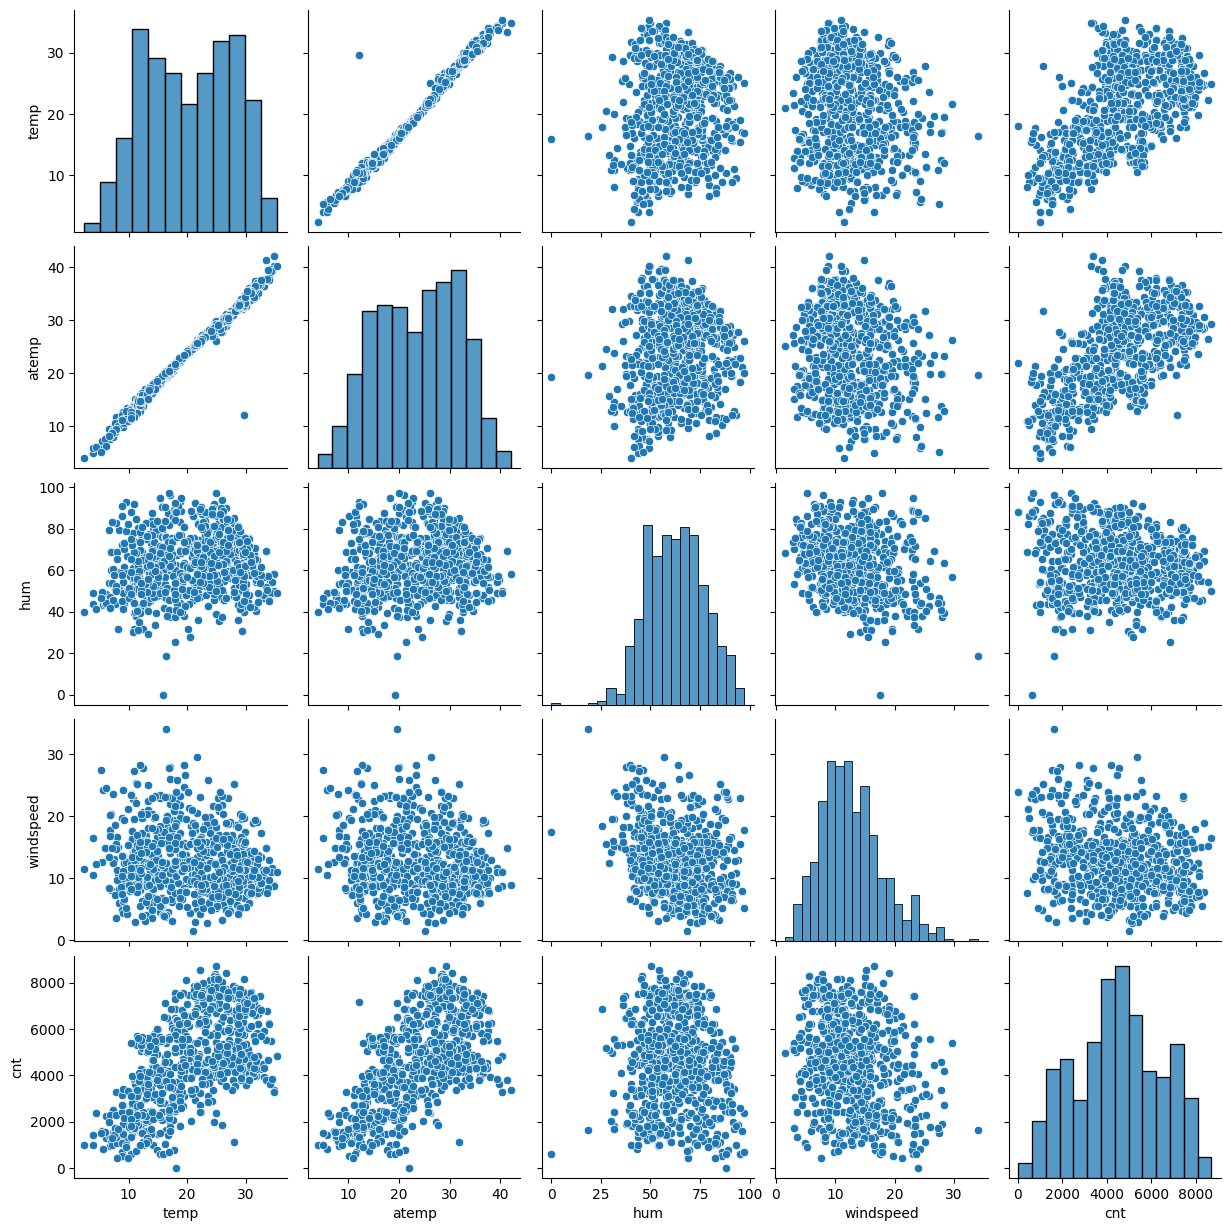

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

# Data Preparation

In [ ]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_dum=pd.get_dummies(df.mnth,drop_first=True,dtype=int)
weekdays_dum=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_dum=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)
seasons_dum=pd.get_dummies(df.season,drop_first=True,dtype=int)

In [ ]:
# Merging  the dataframe, with the dummy variable dataset.
df_new = pd.concat([df,months_dum,weekdays_dum,weathersit_dum,seasons_dum],axis=1)

In [ ]:
# dropping columns as we have already created dummy variable out of it.
df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [ ]:
# check the head of new dataframe
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_rain,mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
#converting columns name as string
df_new.columns = df_new.columns.astype(str)

In [ ]:
X = df_new.drop(['cnt'],axis=1)
y = df_new['cnt']

#Splitting the Data into Training and Testing Sets

In [ ]:
# splitting the dataframe into Train and Test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [ ]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,light_rain,mist,spring,summer,winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.090753,0.087329,0.073630,...,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466,0.251712,0.246575,0.250000
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.287504,0.282558,0.261392,...,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941,0.434369,0.431387,0.433384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Selecting feature using Recursive feature elimination

In [ ]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=15)
selector = selector.fit(x_train, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False,  True])

In [ ]:
selected_features = x_train.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sat', 'light_rain', 'mist', 'spring', 'winter'],
      dtype='object')

In [ ]:
x_train_new = x_train[selected_features]
x_test_new = x_test[selected_features]

In [ ]:
x_train_sm = sm.add_constant(x_train_new)
x_test_sm = sm.add_constant(x_test_new)

In [ ]:
# Generic function to calculate VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
model = sm.OLS(y_train, x_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.02e-223
Time:                        13:18:06   Log-Likelihood:                -4698.6
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     568   BIC:                             9499.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2764.7182    268.565     10.294      0.000    2237.216    3292.221
yr          1989.7071     64.441     30.876      0.000    1863.136    2116.279
holiday     -378.9136    209.831     -1.806      0.071    -791.054      33.227
workingday   442.9934     90.041      4.920      0.000     266.139     619.848
temp        3874.8238    265.501     14.594      0.000    3353.341    4396.306
hum        -1125.7981    306.637     -3.671      0.000   -1728.080    -523.517
windspeed  -1597.3579    205.755     -7.763      0.000   -2001.492   -1193.224
dec         -525.0096    133.356     -3.937      0.000    -786.941    -263.078
jan         -434.2679    142.083     -3.056      0.002    -713.340    -155.195
july        -683.7286    135.918     -5.030      0.000    -950.693    -416.764
nov         -598.3033    148.053     -4.041      0.000    -889.101    -307.506
sat          532.8479    115.377      4.618      0.000     306.231     759.465
light_rain -2289.8562    217.377    -10.534      0.000   -2716.816   -1862.896
mist        -518.8941     84.581     -6.135      0.000    -685.023    -352.765
spring      -960.7205    123.166     -7.800      0.000   -1202.637    -718.804
winter       710.0387    108.281      6.557      0.000     497.359     922.718
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# We can drop holiday variable as it has high p-value
x_train_sm = x_train_sm.drop(['holiday'],axis=1)
x_test_sm = x_test_sm.drop(['holiday'],axis=1)


In [ ]:
model2 = sm.OLS(y_train, x_train_sm).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.59e-224
Time:                        13:18:17   Log-Likelihood:                -4700.3
No. Observations:                 584   AIC:                             9431.
Df Residuals:                     569   BIC:                             9496.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2725.2707    268.207     10.161      0.000    2198.474    3252.067
yr          1988.0103     64.562     30.792      0.000    1861.202    2114.819
workingday   498.8904     84.721      5.889      0.000     332.486     665.295
temp        3850.8158    265.694     14.493      0.000    3328.956    4372.676
hum        -1114.8290    307.186     -3.629      0.000   -1718.185    -511.473
windspeed  -1605.0510    206.119     -7.787      0.000   -2009.899   -1200.203
dec         -538.5695    133.409     -4.037      0.000    -800.604    -276.535
jan         -446.3308    142.208     -3.139      0.002    -725.647    -167.015
july        -680.3817    136.176     -4.996      0.000    -947.850    -412.913
nov         -627.3672    147.467     -4.254      0.000    -917.014    -337.720
sat          588.9766    111.331      5.290      0.000     370.306     807.647
light_rain -2289.7602    217.808    -10.513      0.000   -2717.566   -1861.954
mist        -519.6700     84.747     -6.132      0.000    -686.126    -353.214
spring      -973.1360    123.218     -7.898      0.000   -1215.154    -731.118
winter       710.4383    108.495      6.548      0.000     497.338     923.538
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# calculate VIF for the new model
calculateVIF( x_train_sm)

,Features,VIF
0,const,71.40
3,temp,3.55
13,spring,2.84
14,winter,2.19
4,hum,1.94
12,mist,1.61
7,jan,1.60
9,nov,1.60
2,workingday,1.58
10,sat,1.57


# Residual Analysis

In [ ]:
#Predection on training data
y_train_pred = model2.predict(x_train_sm)

<ipython-input-45-a4b5076477b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


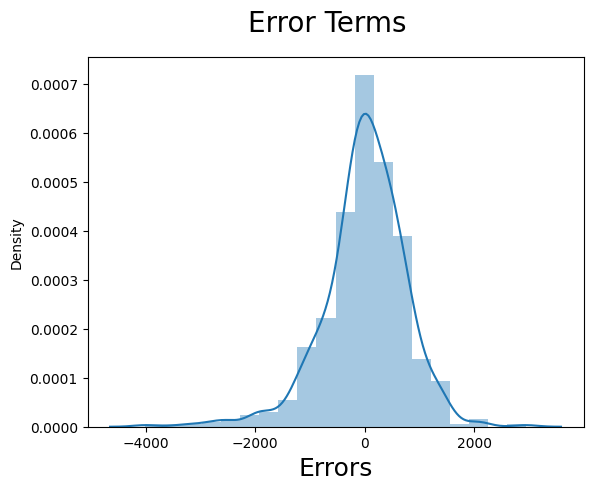

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are following normal distribution with mean near to 0

##Homoscedasticity

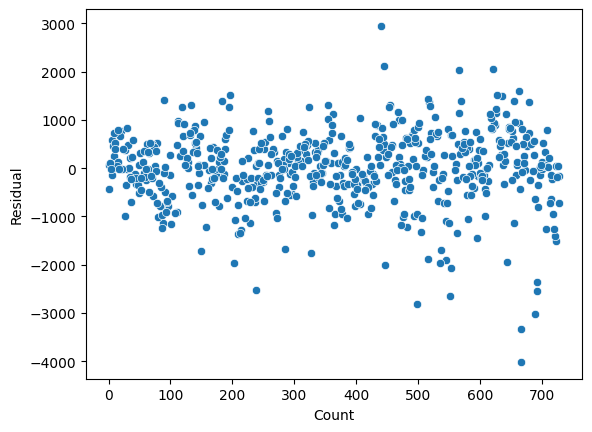

In [ ]:
sns.scatterplot((y_train - y_train_pred))
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#Making Predictions Using the Final Model

In [ ]:
y_test_pred = model2.predict(x_test_sm)

In [ ]:
# Calculating R-square for test data
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7841

In [ ]:
adjusted_r2 = round(1 - (1 - r2) * (x_test_sm.shape[0] - 1) / (x_test_sm.shape[0] - (x_test_sm.shape[1] - 1) - 1), 4)
print(adjusted_r2)

0.761


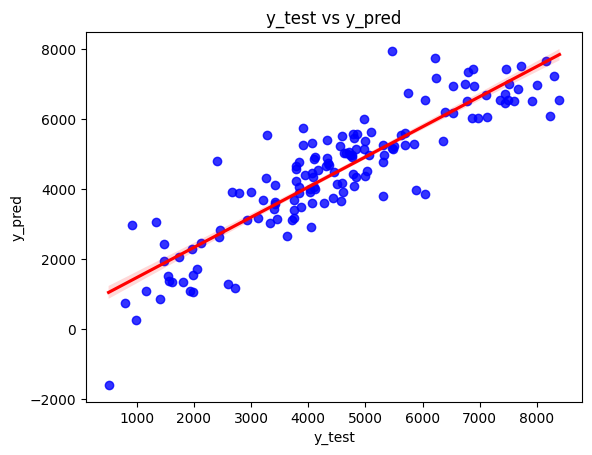

In [ ]:
# Visualizing the fit on the test data
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##**Comparision between Training and Testing dataset:**
- Train dataset R^2          : 0.85
- Test dataset R^2           : 0.7841
- Train dataset Adjusted R^2 : 0.847   
- Test dataset Adjusted R^2  : 0.761


**Demand of bikes depend on year, holiday, workingday, temp, humidity,  windspeed, dec, jan, july, nov, sat, light_rain, mist, spring and winter**.